# Gathering Data 

In [4]:
import pandas as pd
import requests

In [5]:
#loading csv file into jupyter notebook
twitter_df = pd.read_csv('twitter-archive-enhanced.csv')

In [87]:
twitter_df.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [241]:


url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)

In [242]:
response.content 
#to see the content

# to saving the data in file named 'image_predictions.tsv' which is same as csv file but elements are separated by tab spaces
with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

In [14]:
#loading data frame into jupyter notebook
image_predictions_df = pd.read_csv('image-predictions.tsv', sep='\t')

In [244]:
image_predictions_df.head()
#image_predictions_df.info()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Query Twitter Data : Using **Tweepy** API

- Tweepy to query Twitter's API for additional data beyond the data included in the WeRateDogs Twitter archive. This additional data will include retweet count and favorite count.

<font color='red'>This Step took around 40-50 minutes in my computer to fetch each user's Data from Twitter</font>

In [8]:
import tweepy
import json
import numpy as np

In [11]:
# all set of tweet_ids

len(list(twitter_df.tweet_id.unique())) # result is 2356 as same as number of tweet ids in twitter_archive_enhanced data frame

2356

In [114]:
list_tweet_ids = list(twitter_df.tweet_id.unique())
list_tweet_ids

[892420643555336193,
 892177421306343426,
 891815181378084864,
 891689557279858688,
 891327558926688256,
 891087950875897856,
 890971913173991426,
 890729181411237888,
 890609185150312448,
 890240255349198849,
 890006608113172480,
 889880896479866881,
 889665388333682689,
 889638837579907072,
 889531135344209921,
 889278841981685760,
 888917238123831296,
 888804989199671297,
 888554962724278272,
 888202515573088257,
 888078434458587136,
 887705289381826560,
 887517139158093824,
 887473957103951883,
 887343217045368832,
 887101392804085760,
 886983233522544640,
 886736880519319552,
 886680336477933568,
 886366144734445568,
 886267009285017600,
 886258384151887873,
 886054160059072513,
 885984800019947520,
 885528943205470208,
 885518971528720385,
 885311592912609280,
 885167619883638784,
 884925521741709313,
 884876753390489601,
 884562892145688576,
 884441805382717440,
 884247878851493888,
 884162670584377345,
 883838122936631299,
 883482846933004288,
 883360690899218434,
 883117836046

In [22]:
# authentication of API

'''
consumer_key = 'gTnWhHWZGYZ3p4ALDX32ady9h'
consumer_secret = 'YspcOuc5fNWJDDVZXkXyxkhEi39xx6lHPOUHifeqJUNQjS4c5g'
access_token = '901902198602391552-HKHv1LxR4ESXCosZ5dVXmCX0cavnmB2'
access_secret = 'b9rcIiTgAh9S5Zv7PVeWrelgkfxLwU8KuN2E7Ulx8Rwex'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [257]:
# fetching each tweet ids data from API and storing it into file
# named 'tweet_json.txt' we only store 
#  1.tweet_id
#  2.retweet_count
#  3.favorite_count

data = {}
data['people']=[]
counter=0
for tweet_id in list_tweet_ids:
    try:
        counter=counter+1
        print(counter)
        tweet = api.get_status(tweet_id,tweet_mode='extended')
        tweet_id = tweet_id
        retweet_count = tweet._json['retweet_count']
        favorite_count = tweet._json['favorite_count']
        data['people'].append({
            'tweet_id':tweet_id,
            'retweet_count':retweet_count,
            'favorite_count':favorite_count
        })
    except Exception as e:
        print(str(e))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
[{'code': 144, 'message': 'No status found with that ID.'}]
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
[{'code': 144, 'message': 'No status found with that ID.'}]
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
[{'code': 144, 'message': 'No status found with that ID.'}]
120
121
122
123
124
125
126
127
128
129
130
131
132
133
[{'code': 144, 'message': 'No status found with that ID.'}]
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
[{'code': 144, 'message': 'No status found with that ID.'}]
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202


1717
1718
1719
1720
1721
1722
1723
1724
1725
1726
1727
1728
1729
1730
1731
1732
1733
1734
1735
1736
1737
1738
1739
1740
1741
1742
1743
1744
1745
1746
1747
1748
1749
1750
1751
1752
1753
1754
1755
1756
1757
1758
1759
1760
1761
1762
1763
1764
1765
1766
1767
1768
1769
1770
1771
1772
1773
1774
1775
1776
1777
1778
1779
1780
1781
1782
1783
1784
1785
1786
1787
1788
1789
1790
1791
1792
1793
1794
1795
1796
1797
1798
1799
1800
1801
1802
1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1820
1821
1822
1823
1824
1825
1826
1827
1828
1829
1830
1831
1832
1833
1834
1835
1836
1837
1838
1839
1840
1841
1842
1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916


In [255]:
# checking retweet count and favorite count
t = api.get_status(891689557279858688,tweet_mode='extended')


In [256]:
print(t._json['retweet_count'])
print(t._json['favorite_count'])

8678
42033


In [258]:
for item in data['people']:
    item['tweet_id']=str(item['tweet_id'])
    item['retweet_count']=str(item['retweet_count'])
    item['favorite_count']=str(item['favorite_count'])

In [259]:
type(data)

dict

In [261]:
# now dumps the json created to file named 'tweet_json.txt'
with open('tweet_json.txt', 'w') as outfile:  
    json.dump(data, outfile)

In [9]:
#Reading and appending to the list variable, whixh holds dictionary
dict_list=[]
with open('tweet_json.txt') as json_file:
    data = json.load(json_file)
    for p in data['people']:
        dict_list.append({
                'tweet_id':int(p['tweet_id']),
                'retweet_count':int(p['retweet_count']),
                'favorite_count':int(p['favorite_count'])
            })

In [10]:
# read this file, line by line, to create a pandas DataFrame
API_df = pd.DataFrame(dict_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
API_df.head()


,tweet_id,retweet_count,favorite_count
0,892420643555336193,8549,38662
1,892177421306343426,6286,33126
2,891815181378084864,4166,24940
3,891689557279858688,8678,42033
4,891327558926688256,9435,40190


## <font color='red'> Storing Gathered Data to DataBase</font>

### Connect to database

In [555]:
from sqlalchemy import create_engine

In [556]:
engine = create_engine('sqlite:///twitter.db')

### Storing data from dataframe in database

In [264]:
twitter_df.to_sql('table1',engine,index=False)
image_predictions_df.to_sql('table2',engine,index=False)
API_df.to_sql('table3',engine,index=False)

### Importing data from database to dataframe

In [265]:
# just for checking 
df = pd.read_sql('SELECT * FROM table4',engine)
df.head()==API_df.head() # result is true for all values

,tweet_id,retweet_count,favorite_count
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,True,True


# Assessing Data for this Project


## <font color='Blue'>QUALITY:</font>
### twitter_df table
1. wrong datatype for timestamp column and retweeted_status_timestamp
2.  wrong conversion is taken for decimal point numerator while extraction from text column.
3. since we have only 4 types of sources so it must be categorised.
4. wrongly extraction of name {'a','an','the','such','just','getting'} in name column, there must be none in place.
5. missing expanded_urls filling with it using given tweet_id
6.  timestamp column in `twitter_df` can be split into date and time column also convert the datatype of timestamp for some time based special operations of each date(may not be specifically required to split in every case) but can be useful for finding some active hours of users in each date.
7. wrong data type(we should change float to int/string if no further any mathematical calculations needed) of `retweeted and favorite count`(also slice the .0 part)
8. get rid of unnecessary columns (for example retweet related columns) in the final master csv
9. wrong data type of `tweet_id` it must be string beacuse it is not using for any mathematical calculation
###  image_prediction_df
10. Change the names of columns to descriptive one. i.e., __p1 to algo_predict1__ , __p1_conf to algo_predict1_conf__ and so on.


## <font color='Blue'>TIDINESS:</font>
1. doggo, floofer, pupper, puppo columns in `twitter_archive_enhanced.csv` should be combined into a single column as this is one variable that identify stage of dog.
2. **timestamp** column in twitter_df should be split into **date** and **time** column
3. **API_df** should be part of **twitter_df**
4. **image_prediction_df** should be part of **twitter_df** and resulted into `twitter_archive_master.csv`

- Storing Data to `twitter_archive_master.csv` after merging all the tables


In [11]:
twitter_df.info()
#re.findall('\d\.\d', yourString)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
twitter_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [251]:
API_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 3 columns):
tweet_id          2344 non-null int64
retweet_count     2344 non-null int64
favorite_count    2344 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [252]:
API_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.344000e+03,2344.000000,2344.000000
mean,7.422890e+17,3009.507679,8036.641212
std,6.835057e+16,5007.374036,12095.544435
min,6.660209e+17,0.000000,0.000000
25%,6.783704e+17,602.750000,1399.000000
50%,7.187854e+17,1401.500000,3524.500000
75%,7.986989e+17,3502.750000,9936.250000
max,8.924206e+17,76996.000000,142832.000000


In [253]:
twitter_df.timestamp.head()

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object

In [254]:
# finding not null expanded URLs
d2=twitter_df[twitter_df.expanded_urls.notnull()].copy()
d2.expanded_urls.str.split("/",-1,expand=True)

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,https:,,twitter.com,dog_rates,status,892420643555336193,photo,1,None,None,...,None,None,None,None,None,None,None,None,None,None
1,https:,,twitter.com,dog_rates,status,892177421306343426,photo,1,None,None,...,None,None,None,None,None,None,None,None,None,None
2,https:,,twitter.com,dog_rates,status,891815181378084864,photo,1,None,None,...,None,None,None,None,None,None,None,None,None,None
3,https:,,twitter.com,dog_rates,status,891689557279858688,photo,1,None,None,...,None,None,None,None,None,None,None,None,None,None
4,https:,,twitter.com,dog_rates,status,891327558926688256,photo,"1,https:",,twitter.com,...,None,None,None,None,None,None,None,None,None,None
5,https:,,twitter.com,dog_rates,status,891087950875897856,photo,1,None,None,...,None,None,None,None,None,None,None,None,None,None
6,https:,,gofundme.com,"ydvmve-surgery-for-jax,https:",,twitter.com,dog_rates,status,890971913173991426,photo,...,None,None,None,None,None,None,None,None,None,None
7,https:,,twitter.com,dog_rates,status,890729181411237888,photo,"1,https:",,twitter.com,...,None,None,None,None,None,None,None,None,None,None
8,https:,,twitter.com,dog_rates,status,890609185150312448,photo,1,None,None,...,None,None,None,None,None,None,None,None,None,None
9,https:,,twitter.com,dog_rates,status,890240255349198849,photo,1,None,None,...,None,None,None,None,None,None,None,None,None,None


In [21]:
twitter_df[twitter_df['name']=='a']
twitter_df[twitter_df['name']=='an']

tweet_id                      2
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     2
source                        2
text                          2
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 2
rating_numerator              2
rating_denominator            2
name                          2
doggo                         2
floofer                       2
pupper                        2
puppo                         2
dtype: int64

In [256]:
twitter_df.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Oliver       11
Lucy         11
Tucker       10
Penny        10
Lola         10
Winston       9
Bo            9
the           8
Sadie         8
Daisy         7
Toby          7
an            7
Buddy         7
Bailey        7
Dave          6
Oscar         6
Scout         6
Jack          6
Koda          6
Milo          6
Jax           6
Bella         6
Stanley       6
Leo           6
Rusty         6
George        5
           ... 
Kuyu          1
Katie         1
Kloey         1
Jareld        1
Colin         1
Brutus        1
Crawford      1
Linus         1
Aja           1
Jarvis        1
Peanut        1
Chuq          1
Florence      1
Trigger       1
Malikai       1
space         1
Georgie       1
Kaia          1
Fwed          1
Ralf          1
Hector        1
Lizzie        1
Richie        1
Mac           1
Darrel        1
Noah          1
Rambo         1
Tove          1
Superpup      1
Spencer       1
Name: name, Length: 957,

In [257]:
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [261]:
twitter_df.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [262]:
twitter_df.source.nunique() # it must be categorised

4

In [263]:
# API
API_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8549,38662
1,892177421306343426,6286,33126
2,891815181378084864,4166,24940
3,891689557279858688,8678,42033
4,891327558926688256,9435,40190


In [264]:
API_df.retweet_count.value_counts()

495      4
678      4
138      4
131      4
585      4
509      4
328      4
812      4
305      4
1263     4
1278     4
239      4
92       4
1171     4
719      4
390      4
252      4
1362     3
385      3
3610     3
242      3
65       3
913      3
849      3
97       3
2144     3
2159     3
1049     3
409      3
1058     3
        ..
477      1
2909     1
481      1
2532     1
8679     1
2536     1
451      1
439      1
2430     1
437      1
4479     1
387      1
2436     1
24967    1
399      1
2448     1
403      1
405      1
2458     1
411      1
2460     1
4513     1
419      1
425      1
427      1
429      1
431      1
2480     1
2484     1
0        1
Name: retweet_count, Length: 1745, dtype: int64

In [265]:
API_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 3 columns):
tweet_id          2344 non-null int64
retweet_count     2344 non-null int64
favorite_count    2344 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB




# Clean
# <font color="green">Storing a copy</font>





In [148]:
twitter_clean = twitter_df.copy()
image_clean   = image_predictions_df.copy()
API_clean     = API_df.copy()

In [149]:
twitter_df.shape , image_clean.shape , API_clean.shape

((2356, 17), (2075, 12), (2344, 3))

### Missing Data

#### `twitter_df` :  missing expanded_urls filling with it using        given tweet_id

##### Define
Copy the tweet_id to the missing expanded_urls 

#### Code

In [150]:
tc=twitter_clean[twitter_clean.expanded_urls.isnull()].copy()
#https://twitter.com/dog_rates/status/885528943205470208/photo/1
tc['expanded_urls']=('https://twitter.com/dog_rates/status/'+tc['tweet_id'].astype(str)+'/photo/1').str.strip()
twitter_clean.update(tc,join='left',overwrite=False)

#### Test

In [151]:
twitter_clean.shape

(2356, 17)

In [152]:
(twitter_clean.expanded_urls.isnull()==True).sum()
#n0w no null values in expanded_urls

0

In [153]:
twitter_clean.head()
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2356 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### TIDENESS
#### timestamp column in `twitter_df` can be split into date and time column also convert the datatype of timestamp for some time based special operations of each date(may not be specifically required to split in every case) but can be useful for finding some active hours of users in each date.

#### Define

Extract the date and time from the timestamp column  using **str.split** method.Drop the contact coumn when done

#### Code

In [154]:
#we made 2 new columns
twitter_clean['date'] = twitter_clean.timestamp.str.split(" ",1,expand=True)[0]
twitter_clean['time'] = twitter_clean.timestamp.str.split(" ",1,expand=True)[1]

#drop timestamp column
twitter_clean.drop('timestamp',axis=1,inplace=True)

#### Test

In [155]:
twitter_clean.time
twitter_clean.date
twitter_clean.info()
list(twitter_clean) # lost all the updated columns of twiiter_clean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2356 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
date                          2356 non-null object
time                          23

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'date',
 'time']

#### Code

#### API_df should be part of `twitter_df`

#### Define

Merge the API_df table to the `twitter_df` table,joining on given **tweet_id**

#### Code

In [156]:
twitter_clean = pd.merge(twitter_clean,API_df,
                        on = ['tweet_id'],how='left')

In [157]:
twitter_clean.shape # no it has 20 columns, 2 more than previous.

(2356, 20)

In [158]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2356 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
date                          2356 non-null object
time                          23

In [159]:
API_df.shape

(2344, 3)

In [160]:
# we should drop some rows, whose tweet's were not fetched frpm API

#list of rows to drop
twitter_clean[twitter_clean['retweet_count'].isnull()]
# drop those rows, for better table formation, these data is no longer required
twitter_clean.dropna(subset=['retweet_count','favorite_count'],inplace=True)  
twitter_clean[twitter_clean['retweet_count'].isnull()] 
# now no data is seen  That means OKAY :)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time,retweet_count,favorite_count


In [161]:
twitter_clean.shape

(2344, 20)


## Quality



#### wrong datatype for timestamp column(now date and time) and retweeted_status_timestamp

#### Define

convert the date and time column from string to datetime and same for retweeted_status_timestamp

#### Code

In [162]:
twitter_clean.date = pd.to_datetime(twitter_clean.date)
twitter_clean.time = pd.to_datetime(twitter_clean.time)
twitter_clean.retweeted_status_timestamp = pd.to_datetime(twitter_clean.retweeted_status_timestamp)

#### Test

In [163]:
twitter_clean.favorite_count.describe()

count      2344.000000
mean       8036.641212
std       12095.544435
min           0.000000
25%        1399.000000
50%        3524.500000
75%        9936.250000
max      142832.000000
Name: favorite_count, dtype: float64

#### wrong data type of retweeted and favorite count(also slice the .0 part

#### Define
Convert the retweeted and favorite  column's data type from a float to a string using astype, remove the '.0' using string slicing, and pad five and six digit zip codes with a leading 0.

#### Code

In [164]:
twitter_clean.retweet_count = twitter_clean.retweet_count.astype(str).str[:-2].str.pad(5,fillchar='0').astype(int)
twitter_clean.favorite_count = twitter_clean.favorite_count.astype(str).str[:-2].str.pad(6,fillchar='0').astype(int)


#### Test

In [165]:
twitter_clean.info()
#retweet_count is int data type
#favorite_count is int data type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2344 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2344 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
source                        2344 non-null object
text                          2344 non-null object
retweeted_status_id           170 non-null float64
retweeted_status_user_id      170 non-null float64
retweeted_status_timestamp    170 non-null datetime64[ns]
expanded_urls                 2344 non-null object
rating_numerator              2344 non-null int64
rating_denominator            2344 non-null int64
name                          2344 non-null object
doggo                         2344 non-null object
floofer                       2344 non-null object
pupper                        2344 non-null object
puppo                         2344 non-null object
date                          2344 non-null datetime64[ns]
time            

#### wrongly extraction of name {'a','an','the','just','getting','such'} in name column, there must be none in place in `twitter_df` table.

### Define

Replace the a and an from name column with None as have others rows wherever, name is not cleared using `replace method`

### Code

In [166]:
twitter_clean.name = twitter_clean.name.replace('a','None')
twitter_clean.name = twitter_clean.name.replace('an','None')
twitter_clean.name = twitter_clean.name.replace('the','None')
twitter_clean.name = twitter_clean.name.replace('just','None')
twitter_clean.name = twitter_clean.name.replace('getting','None')
twitter_clean.name = twitter_clean.name.replace('such','None')

### Test

In [167]:
#should be empty

twitter_clean[twitter_clean.name=='a']
twitter_clean[twitter_clean.name=='an']
twitter_clean[twitter_clean.name=='the']
twitter_clean[twitter_clean.name=='just']
twitter_clean[twitter_clean.name=='getting']
twitter_clean[twitter_clean.name=='such']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time,retweet_count,favorite_count


In [168]:
twitter_clean.shape

(2344, 20)

#### since we have only 4 types of sources so it must be categorised in `twitter_df` table

#### Define
Convert the sources to categorical data types using `astype` method

#### Code

In [169]:
twitter_clean.source = twitter_clean.source.astype('category')

#### Test

In [170]:
# now it is categorical types
twitter_clean.source.dtype

CategoricalDtype(categories=['<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
                  '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
                  '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
                  '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
                 ordered=False)

#### wrong conversion is taken for decimal point numerator while extraction from text column.


for row 47(name is Bella) and 763(name is Sophie) wrong extraction is taken place 11.27 to 27 qnd 13.5 to 5 means wrong conversion is taken for decimal point numerator.

### Define
we need to replace/update the numerator value by extracting the correct decimal numerator value from text using `regex` using methods `findall` ,then `update` the `twitter_clean`

### Code

In [171]:
import re
import numpy as np

In [172]:
# we make a new column 'abc' which contains the floating point values extracted from text using `regex`
twitter_clean['abc'] = twitter_clean['text'].str.findall(r'\d+\.\d+')
twitter_clean.loc[twitter_clean['abc'].notnull(),['abc']]
twitter_clean.abc = twitter_clean.abc.astype(str).str[1:-1]
temp = twitter_clean[twitter_clean.abc.astype(str)!=''].copy()
temp.abc = temp.abc.str[1:-1] 
temp = temp[temp['rating_numerator']==temp.abc.str.split('.',1,expand=True)[1].astype(int)].copy()
# now have total 6 rows for which ratings_numerator predicted wrong 

# changing the rating_numerator with correct value from column 'abc'

temp.rating_numerator = temp.abc
temp

# Drop the column 'abc'
temp.drop(columns='abc',axis=1,inplace=True)
list(temp)
twitter_clean.drop(columns='abc',axis=1,inplace=True)
list(twitter_clean)
temp.rating_numerator = temp.rating_numerator.astype(float)
twitter_clean.rating_numerator = twitter_clean.rating_numerator.astype(float)
#update the original data frame {twitter_clean} with the value we changed in temp table
#twitter_clean.update(temp,join='left',overwrite=False)

In [173]:
# this is how mapping is donw with the original data frame
m = temp.set_index('tweet_id')['rating_numerator']
twitter_clean.loc[twitter_clean['tweet_id'].isin(temp['tweet_id']) , 'rating_numerator'] = twitter_clean['tweet_id'].map(m)

#### Test

In [174]:
temp.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time,retweet_count,favorite_count
45,883482846933004288,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/883482846...,13.50,10,Bella,None,None,None,None,2017-07-08,2018-08-24 00:28:19,9989,45816
340,832215909146226688,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56,https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,None,None,None,None,2017-02-16,2018-08-24 13:11:49,6823,0
695,786709082849828864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,None,None,None,None,2016-10-13,2018-08-24 23:23:56,6823,19817
763,778027034220126208,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,None,None,pupper,None,2016-09-20,2018-08-24 00:24:34,1813,7126
1689,681340665377193984,6.813394e+17,4.196984e+09,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/681340665...,9.50,10,None,None,None,None,None,2015-12-28,2018-08-24 05:07:27,303,1749


In [175]:
twitter_clean.query(' tweet_id == 681340665377193984')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time,retweet_count,favorite_count
1689,681340665377193984,6.813394e+17,4.196984e+09,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/681340665...,9.5,10,None,None,None,None,None,2015-12-28,2018-08-24 05:07:27,303,1749


In [176]:

temp.shape, twitter_clean.shape

((6, 20), (2344, 20))

#### Change the names of columns to descriptive one. i.e., __p1 to algo_predict1__ , __p1_conf to algo_predict1_conf__ and so on  in `image_prediction_df`

#### Define
rename the coumn name using `df.rename() method`

#### Code

In [177]:
image_clean = image_clean.rename(columns={'p1':'predict_1',
                                        'p1_conf':'algo_predict1_conf',
                                        'p2':'predict_2',
                                        'p2_conf':'algo_predict2_conf',
                                        'p3':'predict_3',
                                        'p3_conf':'algo_predict3_conf'})

#### Test

In [178]:
image_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'predict_1', 'algo_predict1_conf',
       'p1_dog', 'predict_2', 'algo_predict2_conf', 'p2_dog', 'predict_3',
       'algo_predict3_conf', 'p3_dog'],
      dtype='object')


### Storing Data to `twitter_archive_master.csv` after merging all the tables

In [179]:
image_clean.shape , twitter_clean.shape

((2075, 12), (2344, 20))

In [180]:
image_clean.tweet_id.sort_values(ascending=False).head()

2074    892420643555336193
2073    892177421306343426
2072    891815181378084864
2071    891689557279858688
2070    891327558926688256
Name: tweet_id, dtype: int64

In [181]:
twitter_clean.tweet_id.sort_values(ascending=False).head()

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: int64

In [182]:
# to check the all the common column's counts
image_clean[image_clean.tweet_id.isin(twitter_clean.tweet_id.values)].shape

(2068, 12)

In [183]:
#merging
twitter_clean = pd.merge(twitter_clean,image_clean,
                        on = ['tweet_id'],how='right')

In [184]:
twitter_clean.shape

(2075, 31)

In [185]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 31 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
source                        2068 non-null category
text                          2068 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null datetime64[ns]
expanded_urls                 2068 non-null object
rating_numerator              2068 non-null float64
rating_denominator            2068 non-null float64
name                          2068 non-null object
doggo                         2068 non-null object
floofer                       2068 non-null object
pupper                        2068 non-null object
puppo                         2068 non-null object
date                          2068 non-null datetime64[ns]
time         

In [186]:
twitter_clean[twitter_clean['rating_denominator'].isnull()].shape

(7, 31)

In [187]:
# drop the rows contains NaNs
twitter_clean.dropna(subset=['retweet_count','favorite_count'],inplace=True)  

In [188]:
# recheck
twitter_clean[twitter_clean['rating_denominator'].isnull()].shape

(0, 31)

In [189]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2068 entries, 0 to 2067
Data columns (total 31 columns):
tweet_id                      2068 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
source                        2068 non-null category
text                          2068 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null datetime64[ns]
expanded_urls                 2068 non-null object
rating_numerator              2068 non-null float64
rating_denominator            2068 non-null float64
name                          2068 non-null object
doggo                         2068 non-null object
floofer                       2068 non-null object
pupper                        2068 non-null object
puppo                         2068 non-null object
date                          2068 non-null datetime64[ns]
time         

In [190]:
twitter_clean.shape

(2068, 31)

#### wrong data type of `tweet_id` it must be string beacuse it is not using for any mathematical calculation

#### Define
- change the data type of `tweet_id` to string from int


#### Code

In [191]:
twitter_clean.tweet_id = twitter_clean.tweet_id.astype(str)

### Test

In [192]:
twitter_clean.tweet_id.dtype

dtype('O')

#### get rid of unnecessary columns (for example retweet related columns) in the final master csv

#### Define
 - Drop the unneccesary column, which is no more required

#### Code

In [197]:
twitter_clean.drop(columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id'],axis=1,inplace=True)


ValueError: labels ['retweeted_status_id' 'retweeted_status_user_id'
 'retweeted_status_timestamp' 'in_reply_to_status_id' 'in_reply_to_user_id'] not contained in axis

#### Test

In [194]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2068 entries, 0 to 2067
Data columns (total 26 columns):
tweet_id              2068 non-null object
source                2068 non-null category
text                  2068 non-null object
expanded_urls         2068 non-null object
rating_numerator      2068 non-null float64
rating_denominator    2068 non-null float64
name                  2068 non-null object
doggo                 2068 non-null object
floofer               2068 non-null object
pupper                2068 non-null object
puppo                 2068 non-null object
date                  2068 non-null datetime64[ns]
time                  2068 non-null datetime64[ns]
retweet_count         2068 non-null float64
favorite_count        2068 non-null float64
jpg_url               2068 non-null object
img_num               2068 non-null int64
predict_1             2068 non-null object
algo_predict1_conf    2068 non-null float64
p1_dog                2068 non-null bool
predict_2    

In [198]:
twitter_clean.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,predict_1,algo_predict1_conf,p1_dog,predict_2,algo_predict2_conf,p2_dog,predict_3,algo_predict3_conf,p3_dog
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### doggo, floofer, pupper, puppo columns should be combined into a single column as this is one variable that identify `stage` with value `name` of dog.

#### Define

- I am performing this task separately in `demo` dataframe
- using `melt` method
- than `drop`all the rows that do not have any category with `None`

#### Code

In [199]:
demo=twitter_clean.copy()

In [200]:
list(demo.columns)

['tweet_id',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'date',
 'time',
 'retweet_count',
 'favorite_count',
 'jpg_url',
 'img_num',
 'predict_1',
 'algo_predict1_conf',
 'p1_dog',
 'predict_2',
 'algo_predict2_conf',
 'p2_dog',
 'predict_3',
 'algo_predict3_conf',
 'p3_dog']

In [201]:
untouch_list=['tweet_id',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'date',
 'time',
 'retweet_count',
 'favorite_count',
 'jpg_url',
 'img_num',
 'predict_1',
 'algo_predict1_conf',
 'p1_dog',
 'predict_2',
 'algo_predict2_conf',
 'p2_dog',
 'predict_3',
 'algo_predict3_conf',
 'p3_dog']

In [202]:
demo=demo.melt(id_vars=untouch_list,
            var_name="stages",
            value_name="name")

In [203]:
demo.info() #two columns are added named stages and name

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8272 entries, 0 to 8271
Data columns (total 24 columns):
tweet_id              8272 non-null object
source                8272 non-null object
text                  8272 non-null object
expanded_urls         8272 non-null object
rating_numerator      8272 non-null float64
rating_denominator    8272 non-null float64
name                  8272 non-null object
date                  8272 non-null datetime64[ns]
time                  8272 non-null datetime64[ns]
retweet_count         8272 non-null float64
favorite_count        8272 non-null float64
jpg_url               8272 non-null object
img_num               8272 non-null int64
predict_1             8272 non-null object
algo_predict1_conf    8272 non-null float64
p1_dog                8272 non-null bool
predict_2             8272 non-null object
algo_predict2_conf    8272 non-null float64
p2_dog                8272 non-null bool
predict_3             8272 non-null object
algo_predict3_co

In [204]:
demo=demo[~(demo[["name"]]=="None").any(axis=1)]
#dropping all the rows that have None in their name column value

#### Test

In [205]:
demo.info()
# we left with only 334 rows value with accurate data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 9 to 7088
Data columns (total 24 columns):
tweet_id              334 non-null object
source                334 non-null object
text                  334 non-null object
expanded_urls         334 non-null object
rating_numerator      334 non-null float64
rating_denominator    334 non-null float64
name                  334 non-null object
date                  334 non-null datetime64[ns]
time                  334 non-null datetime64[ns]
retweet_count         334 non-null float64
favorite_count        334 non-null float64
jpg_url               334 non-null object
img_num               334 non-null int64
predict_1             334 non-null object
algo_predict1_conf    334 non-null float64
p1_dog                334 non-null bool
predict_2             334 non-null object
algo_predict2_conf    334 non-null float64
p2_dog                334 non-null bool
predict_3             334 non-null object
algo_predict3_conf    334 non-null fl

In [206]:
twitter_clean.info()
# before making into single column of stages rows were 2068

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2068 entries, 0 to 2067
Data columns (total 26 columns):
tweet_id              2068 non-null object
source                2068 non-null category
text                  2068 non-null object
expanded_urls         2068 non-null object
rating_numerator      2068 non-null float64
rating_denominator    2068 non-null float64
name                  2068 non-null object
doggo                 2068 non-null object
floofer               2068 non-null object
pupper                2068 non-null object
puppo                 2068 non-null object
date                  2068 non-null datetime64[ns]
time                  2068 non-null datetime64[ns]
retweet_count         2068 non-null float64
favorite_count        2068 non-null float64
jpg_url               2068 non-null object
img_num               2068 non-null int64
predict_1             2068 non-null object
algo_predict1_conf    2068 non-null float64
p1_dog                2068 non-null bool
predict_2    

# Storing, Analyzing, and Visualizing Data


## <font color='red'>Storing</font>
#### Storing to `twitter_archive_master.csv`

In [208]:
# adding demo to twitter_archive_master.csv
demo.to_csv('twitter_archive_master.csv',encoding='utf-8',index=False)

In [209]:
# re-check
df = pd.read_csv('twitter_archive_master.csv')
df.tweet_id.nunique

<bound method IndexOpsMixin.nunique of 0      890240255349198849
1      884162670584377345
2      872967104147763200
3      871515927908634625
4      869596645499047938
5      858843525470990336
6      855851453814013952
7      854010172552949760
8      851953902622658560
9      846514051647705089
10     845397057150107648
11     836753516572119041
12     834574053763584002
13     832998151111966721
14     832273440279240704
15     832032802820481025
16     831939777352105988
17     831322785565769729
18     829878982036299777
19     829449946868879360
20     829374341691346946
21     828381636999917570
22     826958653328592898
23     826848821049180160
24     826476773533745153
25     826204788643753985
26     821765923262631936
27     821407182352777218
28     821107785811234820
29     819924195358416896
              ...        
304    672614745925664768
305    672594978741354496
306    672481316919734272
307    672254177670729728
308    672205392827572224
309    672160042234327040

#### Storing to `MySQL database` as `master` table

In [609]:
# to databse
twitter_clean.to_sql('master_table',engine,index=False)

In [611]:
# read from databse
df = pd.read_sql('SELECT * FROM master_table',engine)

# Exploring with Visuals
use `twitter_archive_master.csv`

In [111]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
np.random.seed(42)

In [112]:
df = pd.read_csv('twitter_archive_master.csv')

In [113]:
d1 = df.groupby('source')['retweet_count'].mean()
d2 = df.groupby('source')['favorite_count'].mean()
d1,d2

(source
 <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     1231.000000
 <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     4077.963746
 <a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    1249.000000
 Name: retweet_count, dtype: float64, source
 <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                      6973.000000
 <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     10735.444109
 <a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>     3638.500000
 Name: favorite_count, dtype: float64)

In [114]:
# difference between retweeted and favorite for various groups of sources
diff = d2-d1
diff

source
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     5742.000000
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     6657.480363
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    2389.500000
dtype: float64

Text(0,0.5,'Increase in favorite count to retweeted')

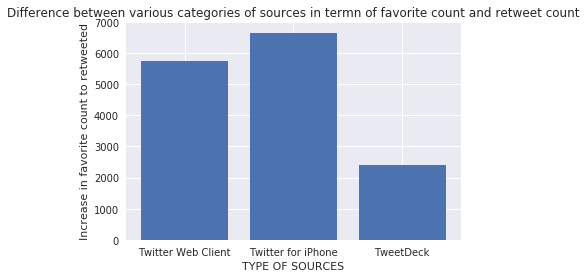

In [115]:

sns.set()
plt.bar(diff.index,diff,tick_label=['Twitter Web Client','Twitter for iPhone','TweetDeck'])
plt.title("Difference between various categories of sources in termn of favorite count and retweet count")
plt.xlabel("TYPE OF SOURCES")
plt.ylabel("Increase in favorite count to retweeted")

## Insight Observation

### 1. Confidence Interval - Difference In means

- Difference in means of numerator value for who are in breed1 dog and breed2 dog

In [116]:
# proportion of person which is a breed1 and  breed2
df['p1_dog'].mean(), df['p2_dog'].mean()

(0.74550898203592819, 0.76347305389221554)

In [117]:
#average numerator value for thode who are in breed1
df[df['p1_dog']==True]['rating_numerator'].mean()

11.366546184738956

In [118]:
#average numerator value for thode who are not in breed1
df[df['p2_dog']==True]['rating_numerator'].mean()

11.322627450980391

- For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average numerator for breed1 and breed2. Build a 95% confidence interval using your sampling distribution.

In [119]:
bootsamp = df.sample(200, replace = True)

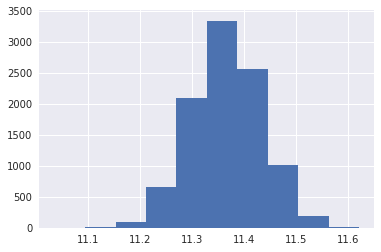

In [120]:
# for breed 1
boot_means = []
for _ in range(10000):
    bootsamp = df.sample(700, replace = True)
    boot_mean = bootsamp[bootsamp['p1_dog'] == True]['rating_numerator'].mean()
    boot_means.append(boot_mean)
    
plt.hist(boot_means); # Looks pretty normal

In [622]:
np.percentile(boot_means, 2.5), np.percentile(boot_means, 97.5)

(10.964246634565887, 12.272980426606791)

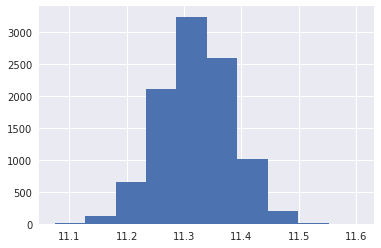

In [121]:
# for breed 2
boot_means = []
for _ in range(10000):
    bootsamp = df.sample(700, replace = True)
    boot_mean = bootsamp[bootsamp['p2_dog'] == True]['rating_numerator'].mean()
    boot_means.append(boot_mean)
    
plt.hist(boot_means); # Looks pretty normal

In [624]:
np.percentile(boot_means, 2.5), np.percentile(boot_means, 97.5)

(10.902426841537027, 12.199749402997366)

#### difference in average numerator value for breed1 dog and breed2 dog
- we are making 95% confidence interval

In [625]:
sample_data = df.sample(200)
diff_avg_num=[]
for _ in range(10000):
    bootsamp = sample_data.sample(200, replace = True)
    breed1_mean = bootsamp[bootsamp['p1_dog'] == True]['rating_numerator'].mean()
    breed2_mean = bootsamp[bootsamp['p2_dog'] == True]['rating_numerator'].mean()
    diff_avg_num.append(breed2_mean - breed1_mean)

np.percentile(diff_avg_num,2.5),np.percentile(diff_avg_num,97.5)

(-0.27410292579088003, 0.038461984793917416)

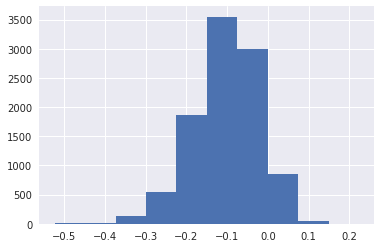

In [626]:
plt.hist(diff_avg_num); # its pretty normal

### 2. Regression: Retweet_count vs. Favorite_count

- fitting the regression curve and find the correlation b/w there two variables

In [122]:
import statsmodels.api as sms;

In [123]:
df['intercept']=1
lm = sms.OLS(df['retweet_count'], df[['intercept', 'favorite_count']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          retweet_count   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     777.9
Date:                Fri, 24 Aug 2018   Prob (F-statistic):           5.10e-89
Time:                        21:43:23   Log-Likelihood:                -3255.7
No. Observations:                 334   AIC:                             6515.
Df Residuals:                     332   BIC:                             6523.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept        -18.5811    270.086     -0.069      0.945    -549.876     512.714
favorite_count     0.3811      0.014     27.891      0.000       0.354       0.408
==============================================================================
Omnibus:                      392.691   Durbin-Watson:                   1.552
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23612.295
Skew:                           5.290   Prob(JB):                         0.00
Kurtosis:                      42.809   Cond. No.                     2.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**r_square value** is 0.7 that means it is closer to 1, also closer to best fit

### 3. Use scatter to create a scatterplot of the relationship between retweeted and favorite counts.

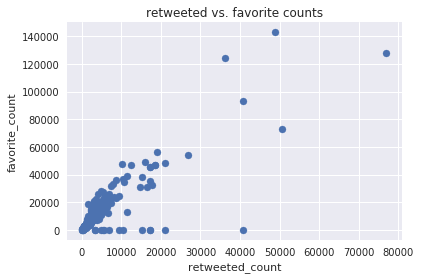

In [124]:
plt.scatter(df['retweet_count'], df['favorite_count']);
plt.xlabel('retweeted_count');
plt.ylabel('favorite_count');
plt.title('retweeted vs. favorite counts');

In [630]:
# there is +ve correlation

#### fit the best line:regression line

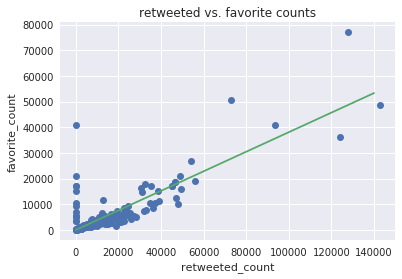

In [125]:
## To show the line that was fit I used the following code from 
## https://plot.ly/matplotlib/linear-fits/
## It isn't the greatest fit... but it isn't awful either


import plotly.plotly as py
import plotly.graph_objs as go

# MatPlotlib
import matplotlib.pyplot as plt
from matplotlib import pylab

# Scientific libraries
from numpy import arange,array,ones
from scipy import stats


xi = arange(0,140000)
A = array([ xi, ones(140000)])

# (Almost) linear sequence
y = df['retweet_count']
x = df['favorite_count']

# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*xi+intercept

plt.plot(x,y,'o', xi, line);
plt.xlabel('retweeted_count');
plt.ylabel('favorite_count');
plt.title('retweeted vs. favorite counts');

In [126]:
slope, intercept

(0.38112732551949463, -18.58113462287929)